# Notebook para testes
Aqui testo as funções.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import signal

In [13]:
def sawtooth_wave():
    t0 = 0.0
    tf = 30.0
    Th = 2.0 # half period
    f = 1/(2*Th)
    A = 0.2*180.0/np.pi
    sample_rate = 1e-3
    #
    tempo = np.arange(t0, tf, sample_rate) 
    sinal_dente = A*signal.sawtooth(2*np.pi*f*tempo)
    #
    interpolation_function = interp1d(tempo, sinal_dente, kind='linear', fill_value="extrapolate")
    return interpolation_function

def double_sawtooth_wave():
    t0 = 0.0
    tf = 30.0
    Th = 3.0 # half period
    f = 1/(2*Th)
    A = 0.4*180.0/np.pi
    sample_rate = 1e-3
    #
    tempo = np.arange(t0, tf, sample_rate) 
    sinal_dente = A*signal.sawtooth(2*np.pi*f*tempo, 0.5)
    #
    interpolation_function = interp1d(tempo, sinal_dente, kind='linear', fill_value="extrapolate")
    return interpolation_function

def square_wave():
    t0 = 0.0
    tf = 30.0
    Th = 2.0 # half period
    f = 1/(2*Th)
    A = 0.2*180.0/np.pi
    sample_rate = 1e-3
    #
    tempo = np.arange(t0, tf, sample_rate) 
    sinal_quadrado = A*np.sign(np.sin(2*np.pi*f*tempo))
    #
    interpolation_function = interp1d(tempo, sinal_quadrado, kind='linear', fill_value="extrapolate")
    return interpolation_function

def sweep_signal(t, C1, C2, Trec, wmin, wmax, A):
    K = C2*(np.exp((C1*t)/Trec)-1)
    w = wmin + K*(wmax-wmin)
    dt=t[1]-t[0]
    theta = np.cumsum(w)*dt # integration of w(t) with respect to t
    delta_sweep = A*np.sin(theta)
    return delta_sweep

def signal_1():
    """
    This function generates an interpolation function for a sweep frequency signal.
    """
    #
    C1 = 4.0 
    C2 = 0.0187 
    Trec = 13.0 
    fmin = 0.1
    wmin = 2*np.pi*fmin
    fmax = 6.0 
    wmax = 2*np.pi*fmax 
    A = 0.2*180/np.pi
    #
    t0 = 0.0
    tf = 15.0
    Ta = 1/(10*fmax)
    #
    tempo = np.arange(t0, tf, Ta) 
    delta_sweep = sweep_signal(tempo, C1, C2, Trec, wmin, wmax, A)
    #
    interpolation_function = interp1d(tempo, delta_sweep, kind='linear', fill_value="extrapolate")
    return interpolation_function

def signal_2():
    """
    This function generates an interpolation function for a tone signal.
    """
    t0 = 0.0
    tf = 15.0
    Ta = 1e-3
    tempo = np.arange(t0, tf, Ta)
    f0=1.0
    w0=2*np.pi*f0
    A=0.2*180/np.pi
    delta_tone = A*np.sin(w0*tempo)
    interpolation_function = interp1d(tempo, delta_tone, kind='linear', fill_value="extrapolate")
    return interpolation_function

In [14]:
tempo = np.arange(0, 30, 1e-2)
delta_tone = double_sawtooth_wave()

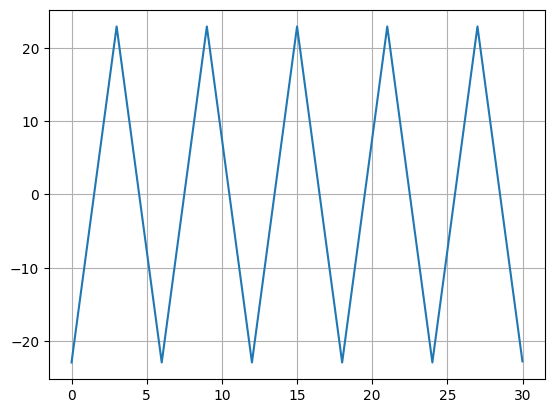

In [15]:
plt.plot(tempo, delta_tone(tempo))
plt.grid()
plt.show()

In [7]:
    Ta = 0.6250 # Tempo de amostragem em millisegundos
    fa = 1/Ta
    t0 = 0.0
    tf = 15.0
    length = int((tf-t0)/Ta) # quantidade de pontos
    tempo = np.linspace(t0, tf, length)
 
    dt = t[1] - t[0]

    C1 = 4.0
    C2 = 0.0187
    Trec = 13.0
    wmin = 0.4*2*np.pi # rad/s
    wmax = 6.0*2*np.pi # rad/s
    f0 = 0.5 # Hz
    w0 = f0*2*np.pi # rad/s
    A = 0.2*180/np.pi
    K = C2*(np.exp((C1*tempo)/Trec)-1)
    w = wmin + K*(wmax-wmin)
    theta = np.cumsum(w)*dt # integration of w(t) with respect to t
    delta_sweep = A*np.sin(theta)
    delta_tone = A*np.sin(w0*tempo) # apenas um tone de w rad/seg de amplitude A graus 

In [20]:
def myfunc(t_querry):
    # Criar a função de interpolação
    interpolation_function = interp1d(tempo, delta_tone, kind='linear', fill_value="extrapolate")
    return interpolation_function(t_querry)

In [11]:
0.2*180.0/np.pi


11.459155902616464